# Analisis dan prediksi karyawan suatu perusahaan resign/attrition

## BY Kelompok 2:

- Ikbar Razan

- Richard

## Latar Belakang

### Analisis

- Mencari tau alasan di balik resignnya/attrition nya karyawan suatu perusahaan dan faktor-faktor yang mempengaruhi

- Melakukan perbandingan terhadap algoritma random forest, xxx,dan xxx pada kasus ini( pastinya algoritma yg kategorikal)

- Menentukan metode terbaik diantara tanpa resampling, undersampling, dan oversampling pada kasus ini.

### Prediksi

Memperkirakan faktor apa yang harus diperhatikan kedepannya agar karyawan tidak resign ketika bekerja di suatu perusahaan

### Data set

link : https://www.kaggle.com/datasets/nezukokamaado/hr-metrics-and-analytics-repository

source : kaggle

### Metadata

- Age : The age of the employee. (Numerical)

- Attrition : Whether or not the employee has left the organization. (Categorical)

- Business Travel : The frequency of business travel for the employee. (Categorical)

- Daily Rate : The daily rate of pay for the employee. (Numerical)

- Department : The department the employee works in. (Categorical)

- Distance From Home : The distance from home in miles for the employee. (Numerical)

- Education : The level of education achieved by the employee. (Categorical)

- EducationField : The field of study for the employee's education. (Categorical)

- Employee Count : The total number of employees in the organization. (Numerical)

- Employee Number : A unique identifier for each employee profile. (Numerical)

- Environment Satisfaction : The employee's satisfaction with their work environment. (Categorical)

- Gender : The gender of the employee. (Categorical)

- Hourly Rate : The hourly rate of pay for the employee. (Numerical)

- Job Involvement : The level of involvement required for the employee's job. (Categorical)

- Job Level : The job level of the employee. (Categorical)

- Job Role : The role of the employee in the organization. (Categorical)

- Job Satisfaction : The employee's satisfaction with their job. (Categorical)

- Marital Status : The marital status of the employee. (Categorical)

- Monthly Income : The monthly income of the employee. (Numerical)

- Monthly Rate : The monthly rate of pay for the employee. (Numerical)

- Num Companies Worked : The number of companies the employee has worked for. (Numerical)

- Over18 : Whether or not the employee is over 18. (Categorical)

- OverTime : Whether or not the employee works overtime. (Categorical)

- Percent Salary Hike : The percentage of salary hike for the employee. (Numerical)

- Performance Rating : The performance rating of the employee. (Categorical)

- Relationship Satisfaction : The employee's satisfaction with their relationships. (Categorical)

- Standard Hours : The standard hours of work for the employee. (Numerical)

- Stock Option Level : The stock option level of the employee. (Numerical)

- Total Working Years : The total number of years the employee has worked. (Numerical)

- Training Times Last Year : The number of times the employee was taken for training in the last year. (Numerical)

- Work Life Balance : The employee's perception of their work-life balance. (Categorical)

- Years At Company : The number of years the employee has been with the company. (Numerical)

- Years In Current Role : The number of years the employee has been in their current role. (Numerical)

- Years Since Last Promotion : The number of years since the employee's last promotion. (Numerical)

- Years With Curr Manager : The number of years the employee has been with their current manager. (Numerical)

## Data Cleaning

### One hot Encoding - Categorical Data

Mengetahui nama nama kolom dari data

In [ ]:
nama_kolom = df.columns
print(nama_kolom)

Index(['Attrition', 'Business Travel', 'CF_age band', 'CF_attrition label',
       'Department', 'Education Field', 'emp no', 'Employee Number', 'Gender',
       'Job Role', 'Marital Status', 'Over Time', 'Over18',
       'Training Times Last Year', '-2', '0', 'Age', 'CF_current Employee',
       'Daily Rate', 'Distance From Home', 'Education', 'Employee Count',
       'Environment Satisfaction', 'Hourly Rate', 'Job Involvement',
       'Job Level', 'Job Satisfaction', 'Monthly Income', 'Monthly Rate',
       'Num Companies Worked', 'Percent Salary Hike', 'Performance Rating',
       'Relationship Satisfaction', 'Standard Hours', 'Stock Option Level',
       'Total Working Years', 'Work Life Balance', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Curr Manager'],
      dtype='object')


In [ ]:
kolom_kategorikal = ['Business Travel', 'CF_age band', 'CF_attrition label','Department','Education Field','Gender',
                        'Job Role','Marital Status','Over Time','Over18','Education'
                        ]

encoded_df = pd.get_dummies(df.copy(), columns= kolom_kategorikal)
encoded_df.head()

,Attrition,emp no,Employee Number,Training Times Last Year,-2,0,Age,CF_current Employee,Daily Rate,Distance From Home,...,Marital Status_Married,Marital Status_Single,Over Time_No,Over Time_Yes,Over18_Y,Education_Associates Degree,Education_Bachelor's Degree,Education_Doctoral Degree,Education_High School,Education_Master's Degree
0,Yes,STAFF-1,1,0,-2,0,41,0,1102,1,...,False,True,False,True,True,True,False,False,False,False
1,No,STAFF-2,2,3,-2,0,49,1,279,8,...,True,False,True,False,True,False,False,False,True,False
2,Yes,STAFF-4,4,3,-2,0,37,0,1373,2,...,False,True,False,True,True,True,False,False,False,False
3,No,STAFF-5,5,3,-2,0,33,1,1392,3,...,True,False,False,True,True,False,False,False,False,True
4,No,STAFF-7,7,3,-2,0,27,1,591,2,...,True,False,True,False,True,False,False,False,True,False


### Feature Selection_Irrelevant data

In [ ]:
kolom_id = ['emp no', 'Employee Number']
df = df.drop(labels=kolom_id, axis = 1)
encoded_df = encoded_df.drop(labels=kolom_id, axis = 1)

# df.shape
encoded_df.shape
encoded_df.head()

,Attrition,Training Times Last Year,-2,0,Age,CF_current Employee,Daily Rate,Distance From Home,Employee Count,Environment Satisfaction,...,Marital Status_Married,Marital Status_Single,Over Time_No,Over Time_Yes,Over18_Y,Education_Associates Degree,Education_Bachelor's Degree,Education_Doctoral Degree,Education_High School,Education_Master's Degree
0,Yes,0,-2,0,41,0,1102,1,1,2,...,False,True,False,True,True,True,False,False,False,False
1,No,3,-2,0,49,1,279,8,1,3,...,True,False,True,False,True,False,False,False,True,False
2,Yes,3,-2,0,37,0,1373,2,1,4,...,False,True,False,True,True,True,False,False,False,False
3,No,3,-2,0,33,1,1392,3,1,4,...,True,False,False,True,True,False,False,False,False,True
4,No,3,-2,0,27,1,591,2,1,1,...,True,False,True,False,True,False,False,False,True,False


### Correlation terhadap Attrition - Categorical Features

kolom yang memiliki hanya data numerik

In [ ]:
kolom_numerikal = ['Training Times Last Year', '-2', '0', 'Age', 'CF_current Employee',
       'Daily Rate', 'Distance From Home','Employee Count',
       'Environment Satisfaction', 'Hourly Rate', 'Job Involvement',
       'Job Level', 'Job Satisfaction', 'Monthly Income', 'Monthly Rate',
       'Num Companies Worked', 'Percent Salary Hike', 'Performance Rating',
       'Relationship Satisfaction', 'Standard Hours', 'Stock Option Level',
       'Total Working Years', 'Work Life Balance', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Curr Manager']

#pengkondisian encoded_df sehingga bersisa kolom kategorikal dan kolom attrition
categorical_encoded_df = encoded_df.drop(kolom_numerikal, axis = 1)
categorical_encoded_df.head()


,Attrition,Business Travel_Non-Travel,Business Travel_Travel_Frequently,Business Travel_Travel_Rarely,CF_age band_25 - 34,CF_age band_35 - 44,CF_age band_45 - 54,CF_age band_Over 55,CF_age band_Under 25,CF_attrition label_Current Employees,...,Marital Status_Married,Marital Status_Single,Over Time_No,Over Time_Yes,Over18_Y,Education_Associates Degree,Education_Bachelor's Degree,Education_Doctoral Degree,Education_High School,Education_Master's Degree
0,Yes,False,False,True,False,True,False,False,False,False,...,False,True,False,True,True,True,False,False,False,False
1,No,False,True,False,False,False,True,False,False,True,...,True,False,True,False,True,False,False,False,True,False
2,Yes,False,False,True,False,True,False,False,False,False,...,False,True,False,True,True,True,False,False,False,False
3,No,False,True,False,True,False,False,False,False,True,...,True,False,False,True,True,False,False,False,False,True
4,No,False,False,True,True,False,False,False,False,True,...,True,False,True,False,True,False,False,False,True,False


Chi Squared Method

In [ ]:
X = categorical_encoded_df.drop('Attrition', axis = 1)
y = categorical_encoded_df['Attrition']

from sklearn.feature_selection import chi2, SelectKBest
chiSelector = SelectKBest(score_func=chi2, k=10).fit(X,y)

df_status = pd.DataFrame(chiSelector.get_support())
df_kolom_kategori = pd.DataFrame(X.columns)
df_skor = pd.DataFrame(chiSelector.scores_)

status_selected_categorical = pd.concat([df_kolom_kategori,df_status,df_skor], axis = 1)
status_selected_categorical.columns = ['Features','status','score_of_chi_squared']
status_selected_categorical.sort_values(by = 'score_of_chi_squared',ascending = False)
# categorical_encoded_df.shape

,Features,status,score_of_chi_squared
9,CF_attrition label_Ex-Employees,True,1.233000e+03
8,CF_attrition label_Current Employees,True,2.370000e+02
34,Over Time_Yes,True,6.384507e+01
7,CF_age band_Under 25,True,3.811910e+01
29,Job Role_Sales Representative,True,3.429027e+01
32,Marital Status_Single,True,3.077167e+01
33,Over Time_No,True,2.519881e+01
1,Business Travel_Travel_Frequently,True,1.581662e+01
4,CF_age band_35 - 44,True,1.354889e+01
23,Job Role_Laboratory Technician,True,1.169949e+01


Dengan melakukan algoritma Chi Square Method, kita dapat mengetahui skor hubungan antara kolom-kolom dengan kolom 'Attrition' sehingga kita mengetahui yang memiliki skor yang sangat tinggi ada kolom 'CF_attrition label_Ex-Employees' dan 'CF_attrition label_Current Employees' , karena memang kolom tersebut hanya berisi label dari kolom 'Attrtion' yang tidak mempengaruhi di modelling dan dapat kita drop.

In [ ]:
# drop CF_attrition label
df = df.drop('CF_attrition label',axis = 1)

Dari sini juga kita tahu, kolom 'Over Time_Yes','CF_age band_Under 25', dan 'Job Role_Sales Representative' memiliki korelasi signifikan dengan kolom attrition dengan memiliki skor yang cukup tinggi

### Correlation terhadap Attrition - Numerical Features

kolom yang memiliki data numerik + kolom attrition

In [ ]:
kolom_numerikal2 = ['Attrition','Training Times Last Year', '-2', '0', 'Age', 'CF_current Employee',
       'Daily Rate', 'Distance From Home','Employee Count',
       'Environment Satisfaction', 'Hourly Rate', 'Job Involvement',
       'Job Level', 'Job Satisfaction', 'Monthly Income', 'Monthly Rate',
       'Num Companies Worked', 'Percent Salary Hike', 'Performance Rating',
       'Relationship Satisfaction', 'Standard Hours', 'Stock Option Level',
       'Total Working Years', 'Work Life Balance', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Curr Manager']

mengetahui korelasi suatu kolom ke target Attrition, Jika nilai mendekati 0 maka semakin tidak memiliki korelasi kolom tersebut dengan kolom attrition (kolom yang perlu di drop)

In [ ]:
korelasi = df[kolom_numerikal2].copy()
korelasi['Attrition'] = korelasi['Attrition'].map({'Yes':1,'No':0})
korelasi.corr()['Attrition'].sort_values(ascending=False)

Attrition                     1.000000
Distance From Home            0.077924
Num Companies Worked          0.043494
Monthly Rate                  0.015170
Performance Rating            0.002889
Hourly Rate                  -0.006846
Percent Salary Hike          -0.013478
Years Since Last Promotion   -0.033019
Relationship Satisfaction    -0.045872
Daily Rate                   -0.056652
Training Times Last Year     -0.059478
Work Life Balance            -0.063939
Environment Satisfaction     -0.103369
Job Satisfaction             -0.103481
Job Involvement              -0.130016
Years At Company             -0.134392
Stock Option Level           -0.137145
Years With Curr Manager      -0.156199
Age                          -0.159205
Monthly Income               -0.159840
Years In Current Role        -0.160545
Job Level                    -0.169105
Total Working Years          -0.171063
CF_current Employee          -1.000000
-2                                 NaN
0                        

dapat dilihat dari hasil output di atas bahwa kolom -2, 0, Employee count, Standard Hours, performance rating , dan hourly rate mendekati 0, sehingga kolom kolom tersebut dapat di drop

### Dropping column

melakukan drop kolom yang disebutkan diatas

In [ ]:
df = df.drop(['-2','0','Employee Count','Standard Hours','Performance Rating','Hourly Rate'], axis = 1, inplace=False)
df.head()

nama_kolom = df.columns
print(nama_kolom)

Index(['Attrition', 'Business Travel', 'CF_age band', 'Department',
       'Education Field', 'Gender', 'Job Role', 'Marital Status', 'Over Time',
       'Over18', 'Training Times Last Year', 'Age', 'CF_current Employee',
       'Daily Rate', 'Distance From Home', 'Education',
       'Environment Satisfaction', 'Job Involvement', 'Job Level',
       'Job Satisfaction', 'Monthly Income', 'Monthly Rate',
       'Num Companies Worked', 'Percent Salary Hike',
       'Relationship Satisfaction', 'Stock Option Level',
       'Total Working Years', 'Work Life Balance', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Curr Manager'],
      dtype='object')


### Nilai Null

Pengecekan dan pengkondisian nilai null

In [ ]:
jumlah_null = df.isna().sum().sum() #tidak ada data yang null
print("Jumlah data null : ", jumlah_null)

Jumlah data null :  0


### Nilai Duplikat

Pengecekan dan pengkondisian nilai duplikat

In [ ]:
jumlah_duplicated = df.duplicated().sum() #tidak ada data yang duplicated
print("jumlah data duplikat : ", jumlah_duplicated)

jumlah data duplikat :  0


## Exploratory Data Analysis

### Perbandingan attrition dengan umur

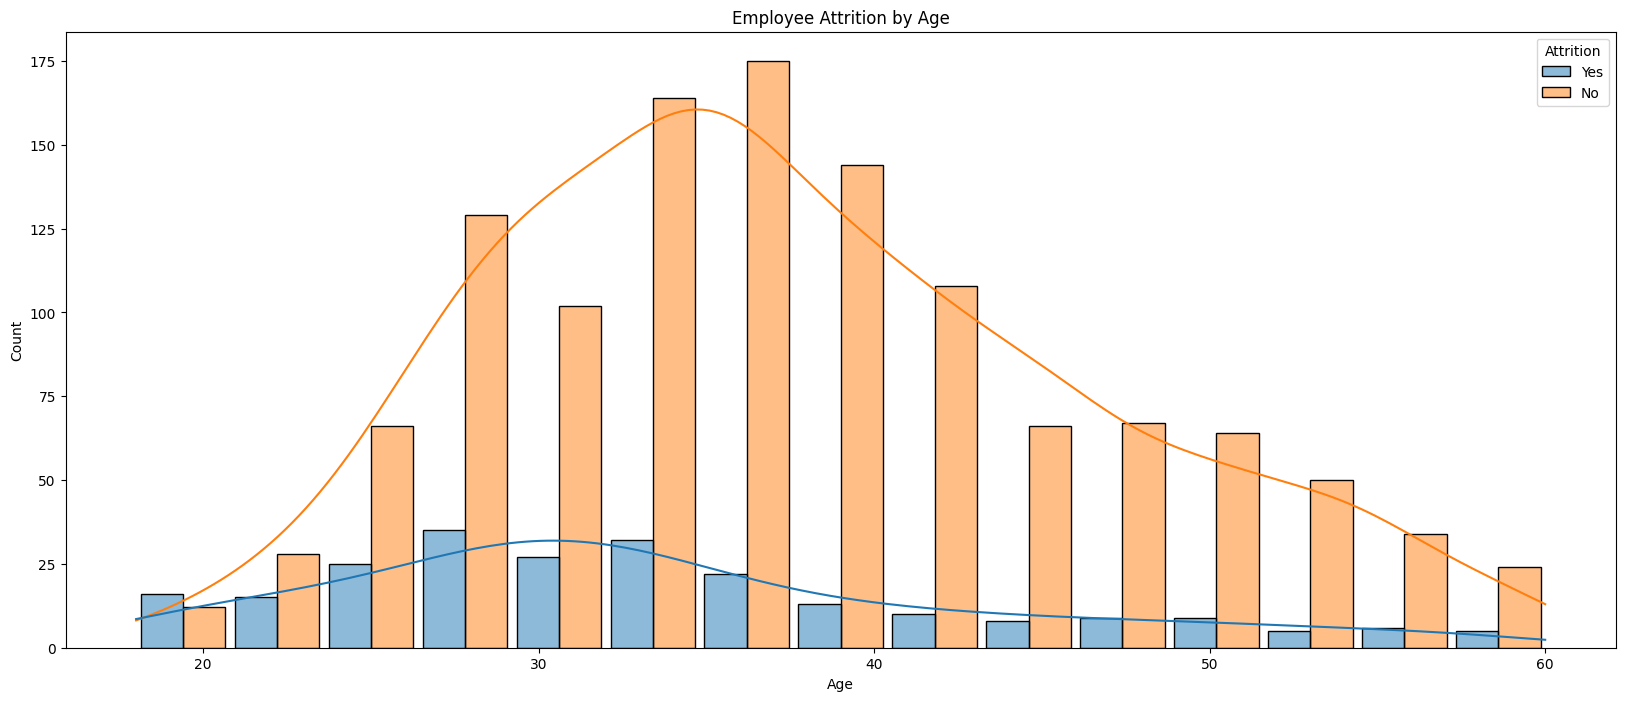

In [ ]:
fig,ax = plt.subplots(1,figsize=(20,8))
sns.histplot(data=df,x='Age',bins=15,hue='Attrition',multiple='dodge',element='bars',kde=True, shrink=.9)
ax.set_title('Employee Attrition by Age')
plt.show()

rata rata umur 35 kebawah memiliki tingkat resign lebih tinggi dari pada yang umur 36 keatas yang berbanding lurus grafik tingkat tidak resign dan resign nya

### Perbandingan Attrition pada Gaji Bulanan

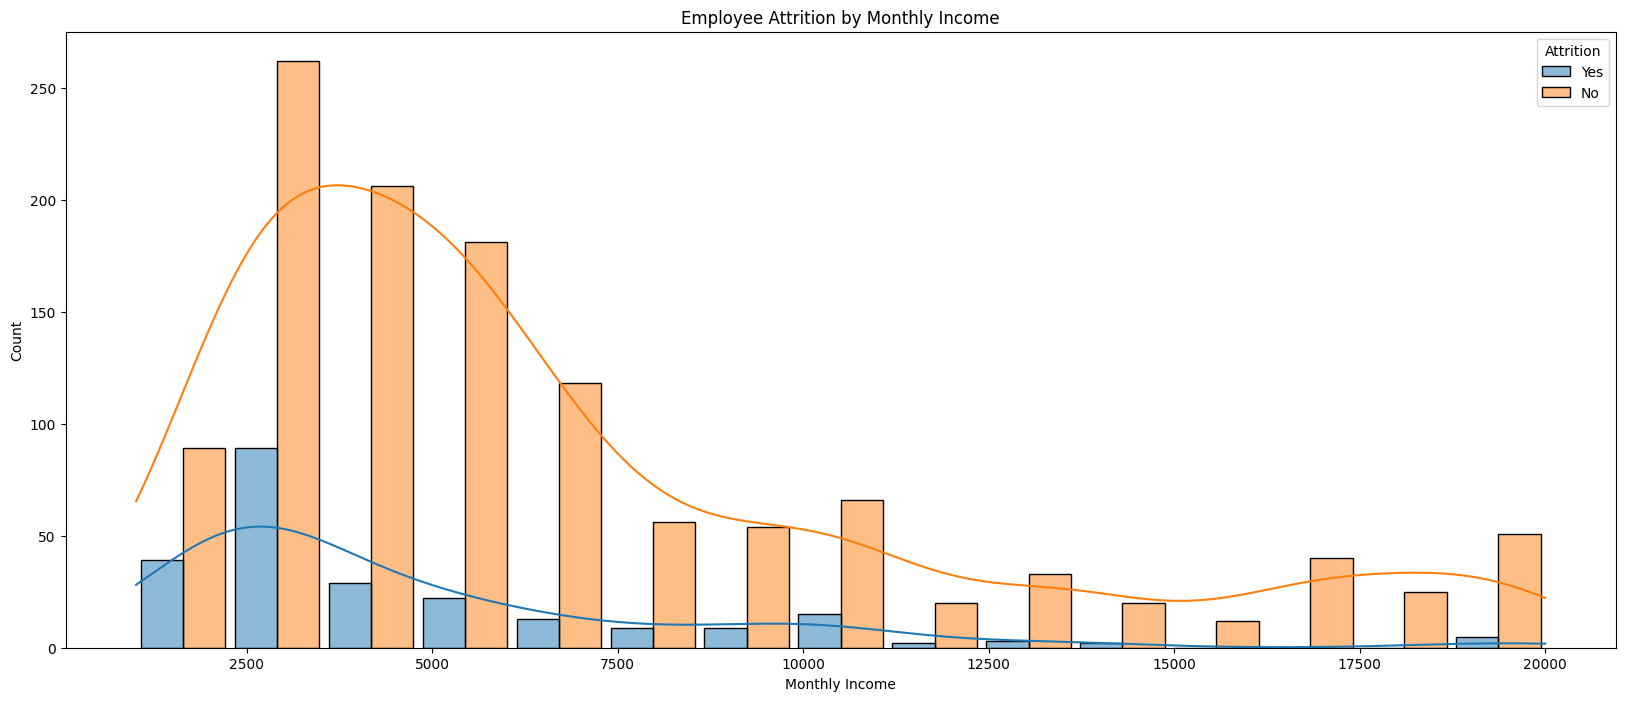

In [ ]:
fig,ax = plt.subplots(1,figsize=(20,8))
sns.histplot(data=df,x='Monthly Income',bins=15,hue='Attrition',multiple='dodge',element='bars',kde=True, shrink=.9)
ax.set_title('Employee Attrition by Monthly Income')
plt.show()

Dapat dilihat dari grafik, yang memiliki gaji bulanan hanya 2500 kebawah memiliki tingkat attrition cukup tinggi

### Tingkat Attrition pada Distance from Home

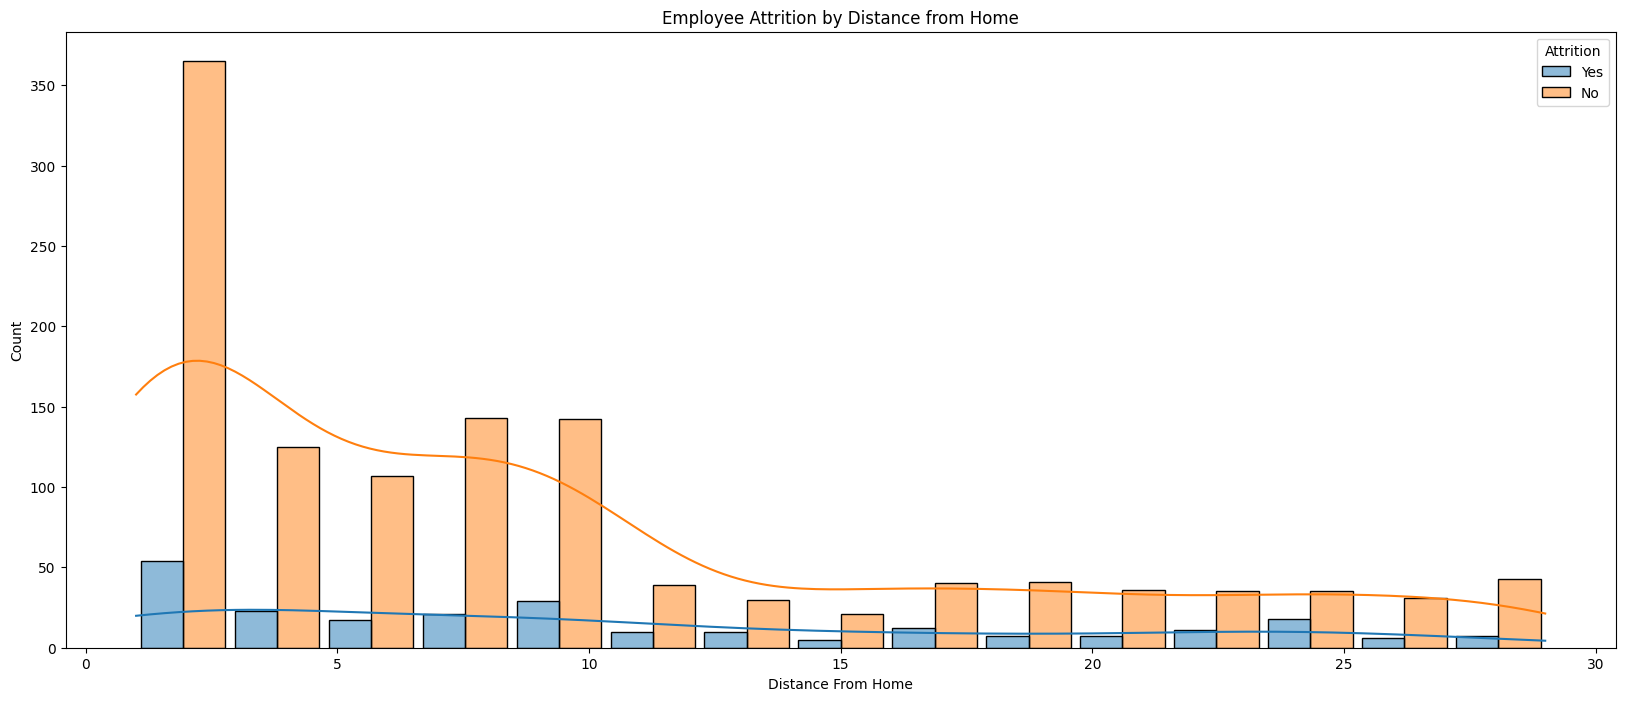

In [ ]:
fig,ax = plt.subplots(1,figsize=(20,8))
sns.histplot(data=df,x='Distance From Home',bins=15,hue='Attrition',multiple='dodge',element='bars',kde=True, shrink=.9)
ax.set_title('Employee Attrition by Distance from Home')
plt.show()

Karyawan yang tidak attrition rata rata memiliki jarak dari rumah kurang dari 5 miles

### Tingkat Attrition pada gaji bulanan per department

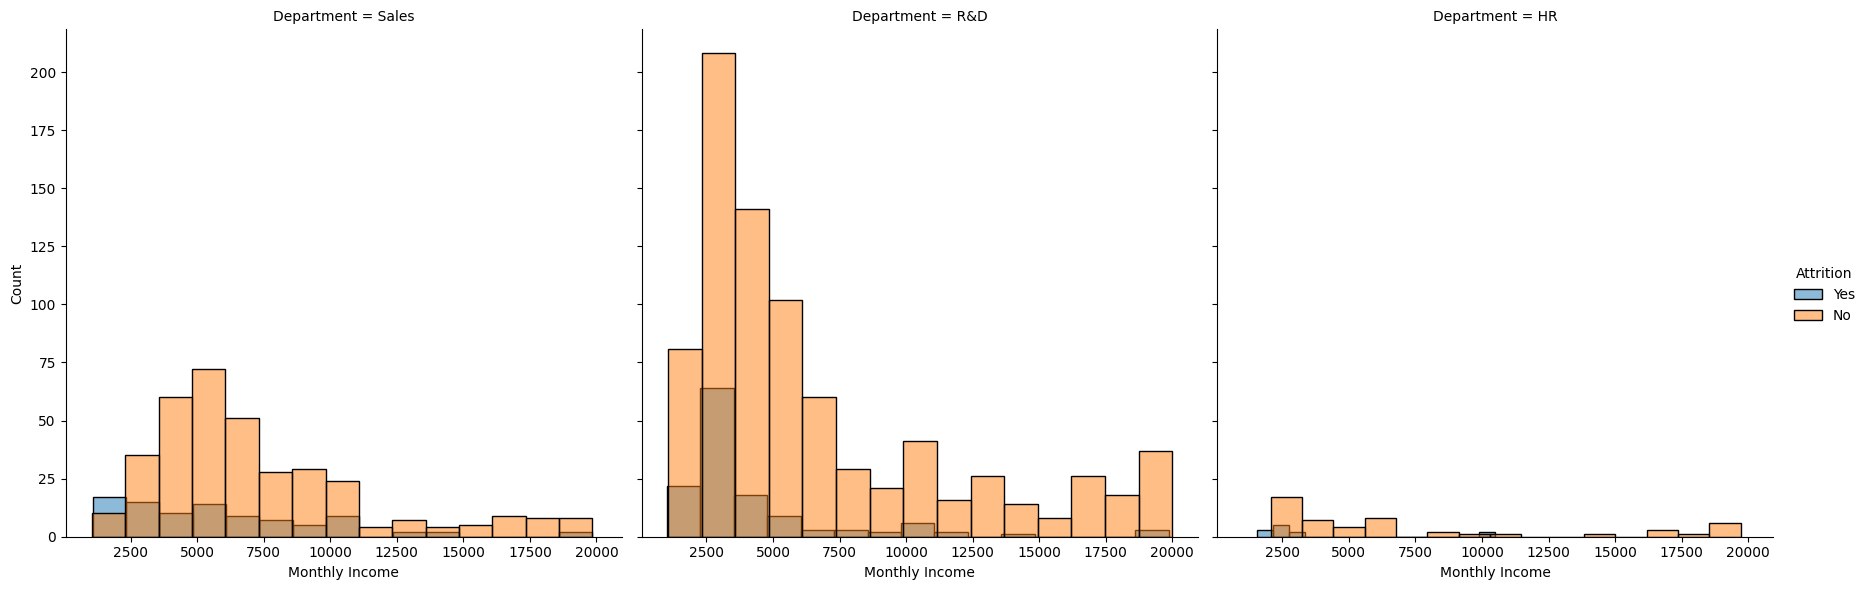

In [ ]:
g = sns.FacetGrid(data=df,col='Department',hue='Attrition',height=6)
g.map(sns.histplot,'Monthly Income',alpha=0.5,multiple='dodge',bins=15).add_legend()

Jika dilihat dari pembagian department, yang memiliki tingkat attrition paling tinggi dari Department R&D yang memiliki income hanya 2500 berbanding lurus karena memiliki jumlah karyawan yang paling banyak juga. Secara perbandingan, karyawan dari departemen Sales memiliki tingkat attrition yang cukup tinggi melihat jumlah karyawan keseluruhannya.

### Tingkat Attrition pada Total Working Years berdasarkan Over Time

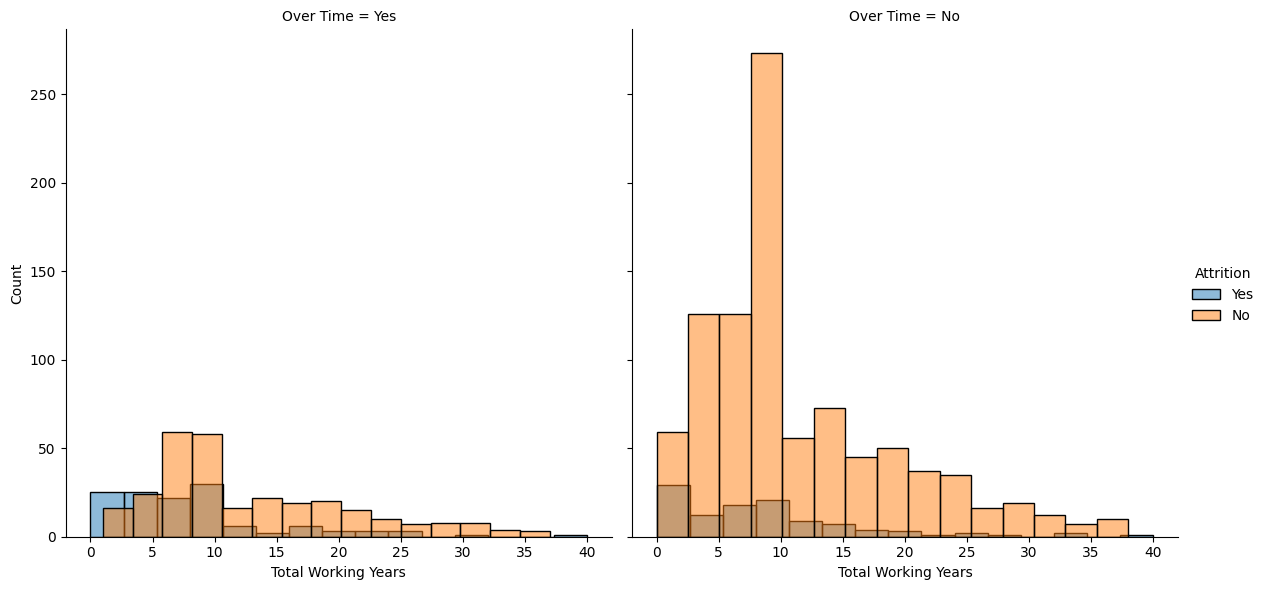

In [ ]:
j = sns.FacetGrid(data=df,col='Over Time',hue='Attrition',height=6)
j.map(sns.histplot,'Total Working Years',alpha=0.5,multiple='dodge',bins=15).add_legend()

rata rata karyawan yang telah bekerja dibawah 10 tahun dan overtime berstatus attrition dan lebih banyak attrition daripada karyawan yang tidak overtime

### Apa faktor yang paling mempengaruhi sehingga suatu karyawan attrition?

<function matplotlib.pyplot.show(close=None, block=None)>

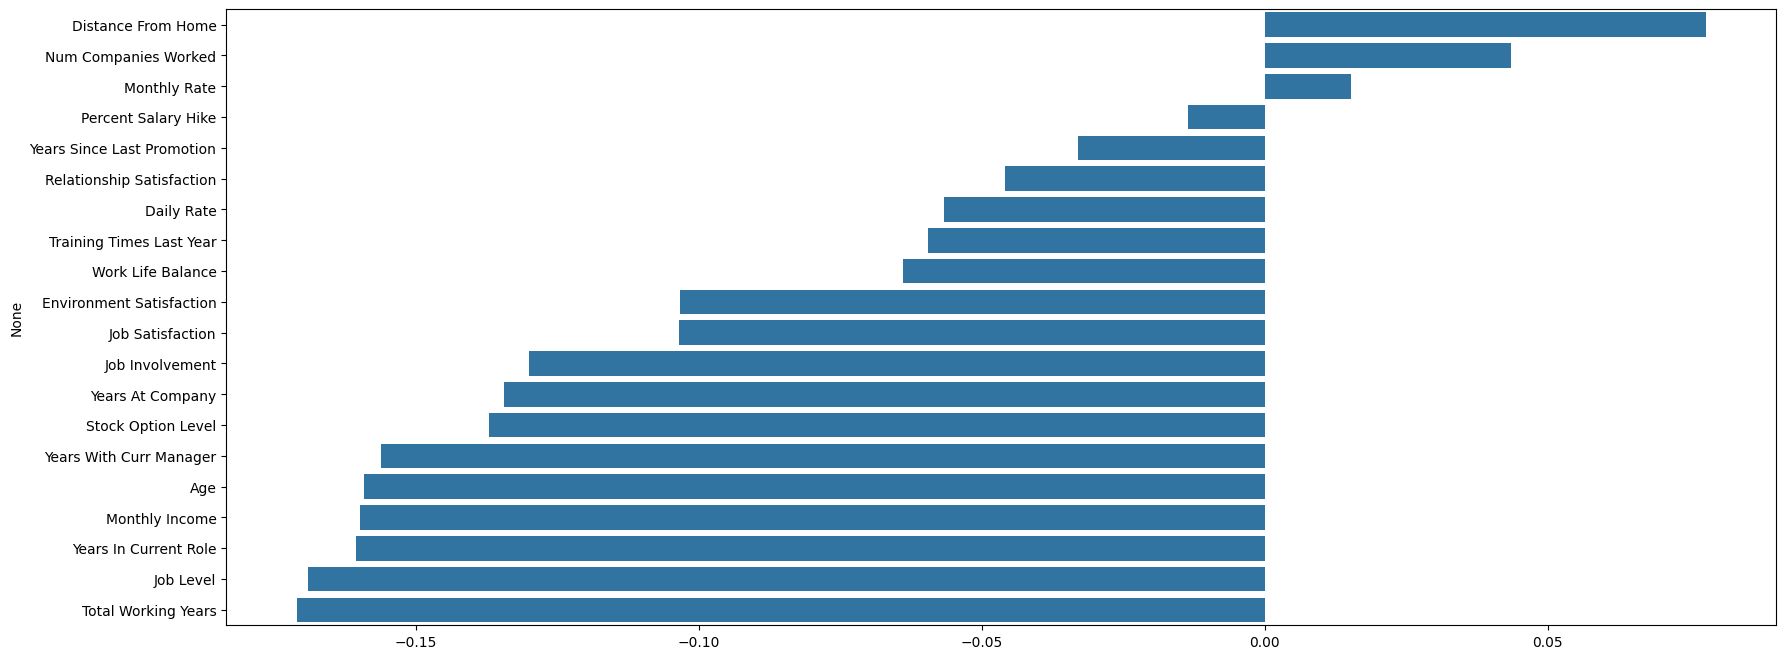

In [ ]:
kolom_numerikal3 = ['Attrition','Training Times Last Year', 'Age', 'Daily Rate', 'Distance From Home',
       'Environment Satisfaction', 'Job Involvement', 'Job Level',
       'Job Satisfaction', 'Monthly Income', 'Monthly Rate',
       'Num Companies Worked', 'Percent Salary Hike',
       'Relationship Satisfaction', 'Stock Option Level',
       'Total Working Years', 'Work Life Balance', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Curr Manager']

data_baru = df[kolom_numerikal3].copy()
data_baru['Attrition'] = data_baru['Attrition'].map({'Yes':1,'No':0})
data_baru = data_baru.corr()['Attrition'].sort_values(ascending=False)[1:]
fig,ax = plt.subplots(1,figsize=(20,8))
sns.barplot(y=data_baru.index,x=data_baru.values,ax=ax)
plt.show

Menurut grafik korelasi, yang paling mempengaruhi suatu karyawan attrition atau tidak berdasarkan jarak dari rumah karyawan '(korelasi positif) dan Total tahun ia telah bekerja (korelasi negatif)

### Apa kondisi yang paling tidak mempengaruhi karyawan Attrition?

In [ ]:
status_selected_categorical.sort_values(by = 'score_of_chi_squared',ascending = True)

,Features,status,score_of_chi_squared
35,Over18_Y,False,3.408412e-30
27,Job Role_Research Scientist,False,1.523054e-04
6,CF_age band_Over 55,False,1.660893e-03
36,Education_Associates Degree,False,5.630291e-02
10,Department_HR,False,3.986264e-01
17,Education Field_Other,False,4.446057e-01
28,Job Role_Sales Executive,False,4.473333e-01
20,Gender_Male,False,5.100865e-01
39,Education_High School,False,5.611869e-01
37,Education_Bachelor's Degree,False,5.942023e-01


In [ ]:
import plotly.express as px
import pandas as pd

# Data dictionary of chi-square scores
data = {
    "Features": [
                 "Over Time_Yes", "CF_age band_Under 25", "Job Role_Sales Representative",
                 "Marital Status_Single", "Over Time_No", "Business Travel_Travel_Frequently",
                 "CF_age band_35 - 44", "Job Role_Laboratory Technician",
                 "Business Travel_Non-Travel", "Job Role_Healthcare Representative", "Marital Status_Divorced",
                 "Education Field_Marketing", "Department_R&D", "Education Field_Medical",
                 "Education Field_Human Resources", "Job Role_Human Resources", "Education_Doctoral Degree",
                 "Business Travel_Travel_Rarely", "Education_Field_Life Sciences", "Gender_Female",
                 "Education_Master's Degree", "Education_Bachelor's Degree", "Education_High School",
                 "Gender_Male", "Job Role_Sales Executive", "Education Field_Other", "Department_HR",
                 "Education_Associates Degree", "CF_age band_Over 55", "Job Role_Research Scientist"
                 ],
    "score_of_chi_squared": [63.84507, 38.1191, 34.29027,
                             30.77167, 25.19881, 15.81662, 13.54889, 11.69949,
                             7.317934, 8.292518, 8.794422,
                             4.079154, 3.702916, 2.222133,
                             1.918878, 1.859753, 1.155566,
                             1.047857, 0.9240444, 0.7651298,
                             0.7067030, 0.5942023, 0.5611869,
                             0.5100865, 0.4473333, 0.4446057, 0.3986264,
                             0.05630291, 0.001660893, 0.0001523054
                             ]
}

# Creating a DataFrame
df_chi_scores = pd.DataFrame(data)

# Visualizing the data using Plotly
fig = px.bar(df_chi_scores, y='Features', x='score_of_chi_squared', orientation='h',
             color='score_of_chi_squared',
             labels={'score_of_chi_squared':'Score of Chi-Square', 'Features':'Features'},
             title="Chi-Square Scores of Features Influence on Attrition",
             color_continuous_scale='RdYlGn_r')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

saat seorang karyawan sebagai laboratory Technician, dan diantara umur 35-44 yang memiliki skor korelasi paling sedikit(dalam status True) dengan suatu karyawan itu attrition atau tidak

Semakin ke angka 4, semakin work life balance. Bisa dilihat bahwa mayoritas dari mereka memiliki tingkat work life balance yang cukup, dan mayoritas yang attrition dari mereka pada tingkat 3, sehingga work life balance bukan menjadi faktor utama suatu karyawan attrition.

In [ ]:
df.shape

(1470, 30)

## Advance Preprocessing Data

### Split Train Test Data

In [ ]:
df_encoded = pd.get_dummies(df_encoded.copy(), columns= ['Attrition'])
df_encoded.drop(['Attrition_No','CF_attrition label_Current Employees','CF_attrition label_Ex-Employees'], axis = 1, inplace = True)
df_encoded.head()

,Training Times Last Year,Age,Daily Rate,Distance From Home,Environment Satisfaction,Job Involvement,Job Level,Job Satisfaction,Monthly Income,Monthly Rate,...,Marital Status_Married,Marital Status_Single,Over Time_No,Over Time_Yes,Education_Associates Degree,Education_Bachelor's Degree,Education_Doctoral Degree,Education_High School,Education_Master's Degree,Attrition_Yes
0,0,41,1102,1,2,3,2,4,5993,19479,...,False,True,False,True,True,False,False,False,False,True
1,3,49,279,8,3,2,2,2,5130,24907,...,True,False,True,False,False,False,False,True,False,False
2,3,37,1373,2,4,2,1,3,2090,2396,...,False,True,False,True,True,False,False,False,False,True
3,3,33,1392,3,4,3,1,3,2909,23159,...,True,False,False,True,False,False,False,False,True,False
4,3,27,591,2,1,3,1,2,3468,16632,...,True,False,True,False,False,False,False,True,False,False


In [ ]:
# split data menjadi data train dan data test
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_encoded, test_size=0.2, random_state=42)
train_df.head()
train_df.shape

(1176, 59)

### Feature selection tahap 2 - RFECV

 Fungsi untuk memvisualisasikan F1-Score Curve terhadap jumlah fitur yang dipilih.

In [ ]:
def visualize_f1_curve(selector, selection_method):
    # atur tampilan grafik
    sns.set(style="white", palette="bright", context="notebook")

    # membuat plot
    plt.figure(figsize=(12, 6))
    plt.xlabel("Jumlah fitur yang akan diambil", fontsize=16)
    plt.ylabel("F1 Score", fontsize=16)

    # menggambar plot line
    sns.lineplot(x=list(range(1, len(selector.cv_results_['mean_test_score']) + 1)), y=selector.cv_results_['mean_test_score'], marker='o', linewidth=2.5)
    plt.xticks(range(0, 66, 3), fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(f"Visualisasi {selection_method}", fontsize=18, pad=20)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

Fungsi Menampilkan rangking tiap fitur

In [ ]:
def tampilkan_rankings(selector, kolom, method_name):
    # Menampilkan skor maksimum berdasarkan jumlah fitur terpilih
    print('skor dengan %d features: %.5f' % (selector.n_features_, selector.cv_results_['mean_test_score'].max()))
    rankings = selector.ranking_
    features_df = pd.DataFrame(kolom, columns=['nama kolom'])
    rankings_df = pd.DataFrame(rankings, columns=['Ranking dari ' + method_name])
    combined_df = pd.concat([features_df, rankings_df], axis=1)
    combined_df.sort_values('Ranking dari ' + method_name, inplace=True)

    return combined_df

RFECV dengan random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.feature_selection import RFECV, RFE
from sklearn.preprocessing import LabelEncoder


X = train_df.drop('Attrition_Yes', axis=1)
y = train_df['Attrition_Yes']

random_forest_clf = RandomForestClassifier(random_state=42, max_depth=15, n_estimators=50, n_jobs=-1)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rfecv_rf = RFECV(estimator=random_forest_clf, step=1, scoring='f1_micro', n_jobs=-1, verbose=2, cv=kf)
rfecv_rf.fit(X, y)



Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 fe

RFECV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
      estimator=RandomForestClassifier(max_depth=15, n_estimators=50, n_jobs=-1,
                                       random_state=42),
      n_jobs=-1, scoring='f1_micro', verbose=2)

Jumlah fitur yang paling optimal: 44


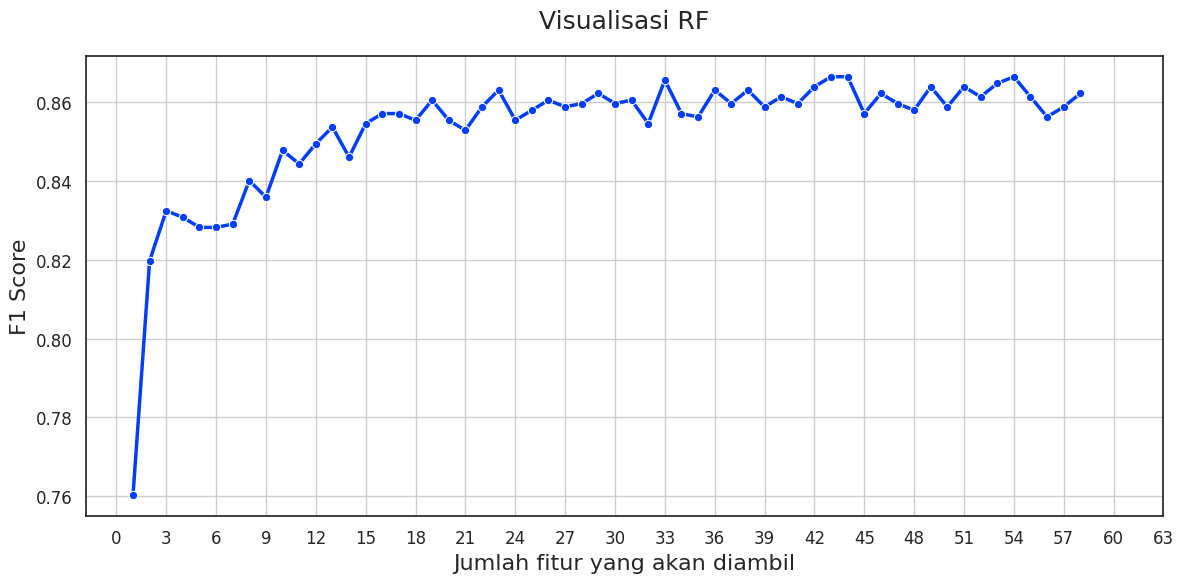

skor dengan 44 features: 0.86650


,nama kolom,Ranking dari RF
0,Training Times Last Year,1
29,Department_R&D,1
30,Department_Sales,1
32,Education Field_Life Sciences,1
33,Education Field_Marketing,1
34,Education Field_Medical,1
36,Education Field_Technical Degree,1
37,Gender_Female,1
38,Gender_Male,1
41,Job Role_Laboratory Technician,1


In [ ]:
jumlah_fitur_optimal = rfecv_rf.n_features_

print('Jumlah fitur yang paling optimal:', jumlah_fitur_optimal)
visualize_f1_curve(rfecv_rf, 'RF')
rangking_rfecv_rf_df =  tampilkan_rankings(rfecv_rf, X.columns, 'RF').head(jumlah_fitur_optimal)
rangking_rfecv_rf_df


In [ ]:
# train_df.shape
selected_rfecv = rangking_rfecv_rf_df.iloc[:,0]
selected_rfecv = selected_rfecv.tolist() + ['Attrition_Yes']
# print(selected_rfecv)


selected_rfecv_train_df = train_df[selected_rfecv].copy()
selected_rfecv_test_df = test_df[selected_rfecv].copy()

print('data train = ', selected_rfecv_train_df.shape)
print('data test = ', selected_rfecv_test_df.shape)

data train =  (1176, 45)
data test =  (294, 45)


In [ ]:
Train_x = selected_rfecv_train_df.drop('Attrition_Yes', axis = 1)
Train_y= selected_rfecv_train_df['Attrition_Yes']

Test_x = selected_rfecv_test_df.drop('Attrition_Yes', axis = 1)
Test_y= selected_rfecv_test_df['Attrition_Yes']

## Modeling

### Tuning Models

Tuning model Logistic Regression dengan GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for Logistic Regression
logreg_params = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "solver": ["lbfgs", "newton-cg", "liblinear", "sag", "saga"]
}

# Create a GridSearchCV instance for Logistic Regression
logreg_tuner = GridSearchCV(LogisticRegression(), logreg_params, scoring="f1", cv=5, n_jobs=-1, verbose=1)

# Fit the GridSearchCV instance
logreg_tuner.fit(Train_x, Train_y)

# Print best parameters
print(f"Best parameters for Logistic Regression: {logreg_tuner.best_params_}")

Fitting 5 folds for each of 140 candidates, totalling 700 fits
Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}



Untuk mentuning model Xgboost dan Catboost, kita perlu mendefinisikan hyperparameter khusus model dan melakukan operasi serupa dengan RandomizedSearchCV:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# HYPERPARAMETERS FOR XGBOOST
# Adjusted hyperparameters for Xgboost to reduce overfitting
xgboost_params = {
    'n_estimators': [100, 150, 200, 250, 300],  # Reduced upper limit
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],  # Narrowed range to lower values
    'subsample': [0.6, 0.7, 0.8, 0.9, 1],  # Increased granularity
    'max_depth': [3, 4, 5, 6, 7],  # Reduced depth options
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1]  # Increased granularity
}

# Create a RandomizedSearchCV instance for Xgboost
xgboost_tuner = RandomizedSearchCV(XGBClassifier(), xgboost_params, n_iter=100, scoring="f1", cv=5, n_jobs=-1, verbose=1, random_state=42)
# Fit the RandomizedSearchCV instance
xgboost_tuner.fit(Train_x, Train_y)

# HYPERPARAMETER FOR CATBOOST
# Adjusted hyperparameters for CatBoost to reduce overfitting
catboost_params = {
    'iterations': [100, 150, 200],
    'depth': [2, 3, 4, 5, 6],  # Reduced depth options
    'learning_rate': [0.01, 0.05, 0.1]  # Kept original range
}

# Create a RandomizedSearchCV instance for CatBoost
catboost_tuner = RandomizedSearchCV(CatBoostClassifier(), catboost_params, n_iter=100, scoring="f1", cv=5, n_jobs=-1, verbose=1, random_state=42)
# Fit the RandomizedSearchCV instance
catboost_tuner.fit(Train_x, Train_y)

# Print best parameters
print(f"Best parameters for Catboost: {catboost_tuner.best_params_}")
print(f"Best parameters for XGBoost: {xgboost_tuner.best_params_}")

3:	learn: 0.4858359	total: 10.2ms	remaining: 499ms
4:	learn: 0.4599738	total: 12.1ms	remaining: 470ms
5:	learn: 0.4371991	total: 13.9ms	remaining: 450ms
6:	learn: 0.4184964	total: 15.7ms	remaining: 434ms
7:	learn: 0.4015675	total: 17.6ms	remaining: 423ms
8:	learn: 0.3882582	total: 19.5ms	remaining: 413ms
9:	learn: 0.3727307	total: 21.3ms	remaining: 404ms
10:	learn: 0.3556270	total: 23.1ms	remaining: 397ms
11:	learn: 0.3421088	total: 25.4ms	remaining: 398ms
12:	learn: 0.3333285	total: 27.5ms	remaining: 396ms
13:	learn: 0.3194085	total: 30ms	remaining: 398ms
14:	learn: 0.3057265	total: 32.5ms	remaining: 400ms
15:	learn: 0.2957390	total: 34.9ms	remaining: 402ms
16:	learn: 0.2872307	total: 37.8ms	remaining: 407ms
17:	learn: 0.2823111	total: 40.3ms	remaining: 408ms
18:	learn: 0.2788436	total: 42.7ms	remaining: 407ms
19:	learn: 0.2743060	total: 45.2ms	remaining: 407ms
20:	learn: 0.2697023	total: 47.6ms	remaining: 406ms
21:	learn: 0.2638413	total: 50.1ms	remaining: 406ms
22:	learn: 0.2569589	

In [ ]:
models_optimized = []
models_optimized.append(('Optimized LogRegression', LogisticRegression(C= 10, penalty= "l1", solver= "liblinear")))
models_optimized.append(('Optimized XGBoost', XGBClassifier(subsample= 0.6, n_estimators= 300, max_depth= 3, learning_rate= 0.2, colsample_bytree= 1)))
models_optimized.append(('Optimized CatBoost', CatBoostClassifier(iterations=200, depth=4, learning_rate=0.1)))

model_name_optimized = []
model_metrics_optimized = []

for i in models_optimized:
    model_name_optimized.append(i[0])
    model_metrics_optimized.append(mod(i[1]))

final_optimized = pd.DataFrame(model_metrics_optimized, columns = ['F1'], index = model_name_optimized)
final_optimized.sort_values(by = 'F1', ascending = False)

1:	learn: 0.5833997	total: 14.7ms	remaining: 1.46s
2:	learn: 0.5477209	total: 16.4ms	remaining: 1.07s
3:	learn: 0.5098645	total: 26ms	remaining: 1.27s
4:	learn: 0.4850937	total: 27.3ms	remaining: 1.06s
5:	learn: 0.4582996	total: 28.4ms	remaining: 919ms
6:	learn: 0.4386186	total: 29.8ms	remaining: 821ms
7:	learn: 0.4167008	total: 32.9ms	remaining: 789ms
8:	learn: 0.4063519	total: 34.1ms	remaining: 724ms
9:	learn: 0.3953135	total: 35.8ms	remaining: 680ms
10:	learn: 0.3855437	total: 37.6ms	remaining: 646ms
11:	learn: 0.3752197	total: 40.3ms	remaining: 631ms
12:	learn: 0.3684862	total: 41.9ms	remaining: 603ms
13:	learn: 0.3612139	total: 43.1ms	remaining: 572ms
14:	learn: 0.3557231	total: 44.7ms	remaining: 551ms
15:	learn: 0.3524923	total: 47.1ms	remaining: 542ms
16:	learn: 0.3495287	total: 48.9ms	remaining: 527ms
17:	learn: 0.3460919	total: 50.4ms	remaining: 510ms
18:	learn: 0.3416080	total: 52.7ms	remaining: 502ms
19:	learn: 0.3370158	total: 53.8ms	remaining: 485ms
20:	learn: 0.3331984	to

,F1
Optimized LogRegression,0.544612
Optimized XGBoost,0.514406
Optimized CatBoost,0.476445


0:	learn: 0.6307218	total: 1.47ms	remaining: 293ms
1:	learn: 0.5847576	total: 2.85ms	remaining: 282ms
2:	learn: 0.5500435	total: 4.12ms	remaining: 270ms
3:	learn: 0.5116935	total: 5.42ms	remaining: 266ms
4:	learn: 0.4888893	total: 8.53ms	remaining: 333ms
5:	learn: 0.4601474	total: 9.73ms	remaining: 315ms
6:	learn: 0.4407538	total: 11ms	remaining: 304ms
7:	learn: 0.4183983	total: 12.3ms	remaining: 296ms
8:	learn: 0.4046207	total: 13.6ms	remaining: 289ms
9:	learn: 0.3941150	total: 14.9ms	remaining: 283ms
10:	learn: 0.3844161	total: 16.1ms	remaining: 276ms
11:	learn: 0.3778998	total: 17.3ms	remaining: 272ms
12:	learn: 0.3703522	total: 18.6ms	remaining: 268ms
13:	learn: 0.3641468	total: 19.9ms	remaining: 264ms
14:	learn: 0.3587812	total: 21.1ms	remaining: 260ms
15:	learn: 0.3545307	total: 22.3ms	remaining: 257ms
16:	learn: 0.3495879	total: 23.6ms	remaining: 254ms
17:	learn: 0.3448617	total: 24.8ms	remaining: 251ms
18:	learn: 0.3413294	total: 26.1ms	remaining: 249ms
19:	learn: 0.3376720	tot

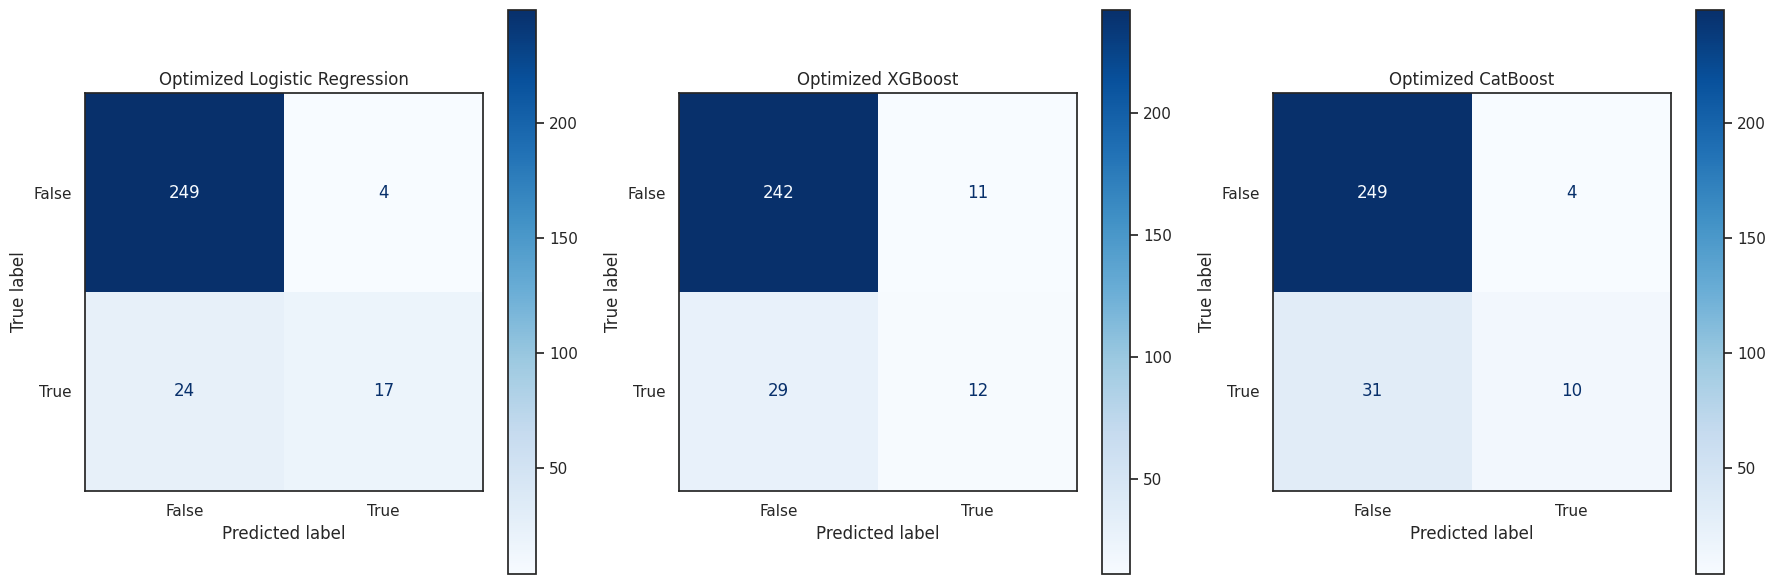

In [ ]:
# Initialize the optimized models
optimized_logreg = LogisticRegression(C= 10, penalty= "l1", solver= "liblinear")
optimized_xgboost = XGBClassifier(subsample=0.6, n_estimators=300, max_depth=3, learning_rate=0.2, colsample_bytree=1)
optimized_catboost = CatBoostClassifier(iterations=200, depth=4, learning_rate=0.1)

# Fit the optimized models on the training data (Assuming the existence of Train_x and Train_y)
optimized_logreg.fit(Train_x, Train_y)
optimized_xgboost.fit(Train_x, Train_y)
optimized_catboost.fit(Train_x, Train_y)

# Confusion Matrix for Optimized Logistic Regression
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

plot_confusion_matrix(optimized_logreg, Test_x, Test_y, ax=ax[0], cmap='Blues')
ax[0].set_title('Optimized Logistic Regression')

# Confusion Matrix for Optimized XGBoost
plot_confusion_matrix(optimized_xgboost, Test_x, Test_y, ax=ax[1], cmap='Blues')
ax[1].set_title('Optimized XGBoost')

# Confusion Matrix for Optimized CatBoost
plot_confusion_matrix(optimized_catboost, Test_x, Test_y, ax=ax[2], cmap='Blues')
ax[2].set_title('Optimized CatBoost')

plt.tight_layout()
plt.show()

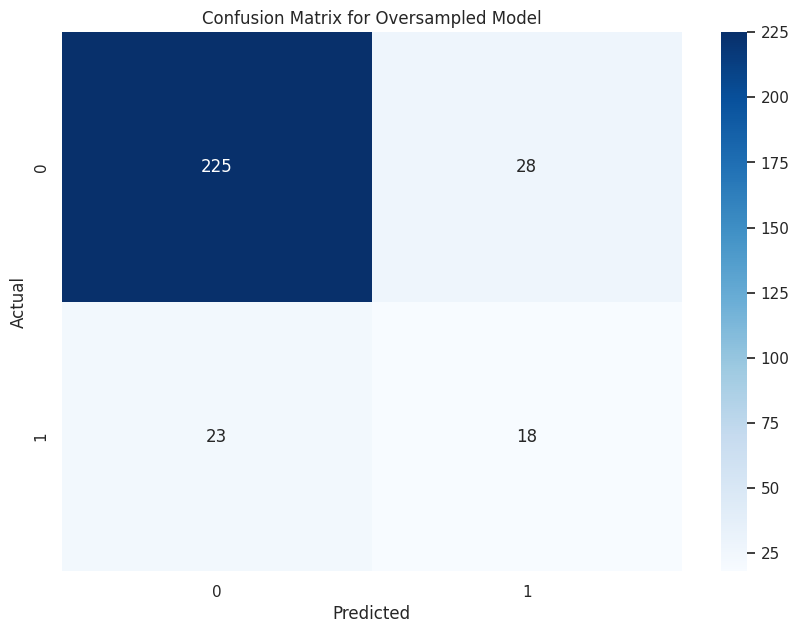

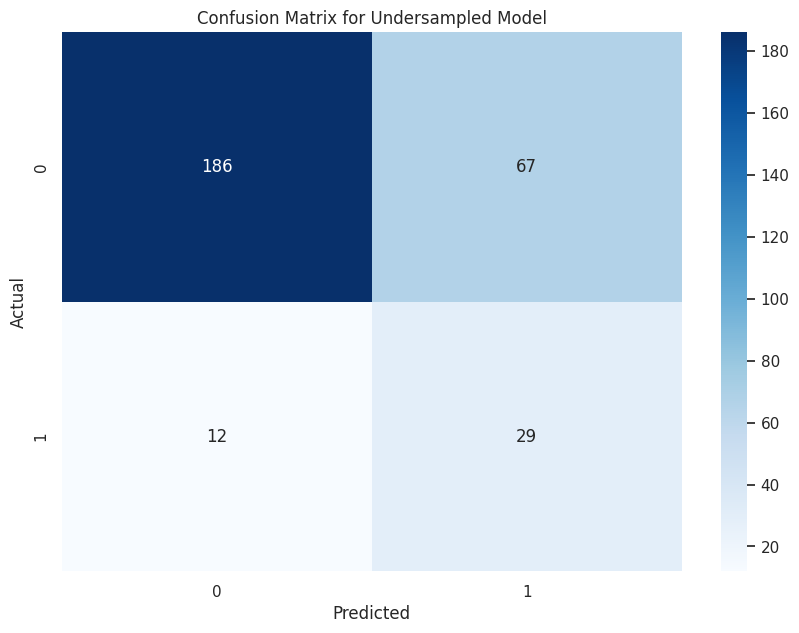

In [ ]:
# Define model
model = optimized_logreg  # Example: Logistic Regression Model

# Oversampling
oversampler = SMOTE()
X_resampled_over, y_resampled_over = oversampler.fit_resample(Train_x, Train_y)
model.fit(X_resampled_over, y_resampled_over)
preds_over = model.predict(Test_x)

# Confusion Matrix for Oversampled Model
cm_over = confusion_matrix(Test_y, preds_over)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_over, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Oversampled Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Undersampling
undersampler = RandomUnderSampler()
X_resampled_under, y_resampled_under = undersampler.fit_resample(Train_x, Train_y)
model.fit(X_resampled_under, y_resampled_under)
preds_under = model.predict(Test_x)

# Confusion Matrix for Undersampled Model
cm_under = confusion_matrix(Test_y, preds_under)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_under, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Undersampled Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Note: Replace `LogisticRegression()` with the model you are using, be it 'Optimized_Logreg', 'Optimized_XGBoost', 'Optimized_CatBoost', or any other model.

In [ ]:
model_score_optimized = []
for name, model in models_optimized:
    model.fit(Train_x, Train_y)
    pred_y = model.predict(Test_x)
    f1 = f1_score(Test_y, pred_y)
    model_score_optimized.append(f1)

final_score_optimized = pd.DataFrame(model_score_optimized, columns = ['F1 Score'], index = model_name_optimized)
final_score_optimized.sort_values(by = 'F1 Score', ascending = False)

0:	learn: 0.6307218	total: 1.24ms	remaining: 246ms
1:	learn: 0.5847576	total: 2.46ms	remaining: 244ms
2:	learn: 0.5500435	total: 3.53ms	remaining: 232ms
3:	learn: 0.5116935	total: 4.53ms	remaining: 222ms
4:	learn: 0.4888893	total: 5.56ms	remaining: 217ms
5:	learn: 0.4601474	total: 6.55ms	remaining: 212ms
6:	learn: 0.4407538	total: 7.49ms	remaining: 207ms
7:	learn: 0.4183983	total: 8.51ms	remaining: 204ms
8:	learn: 0.4046207	total: 9.59ms	remaining: 203ms
9:	learn: 0.3941150	total: 10.6ms	remaining: 202ms
10:	learn: 0.3844161	total: 11.7ms	remaining: 202ms
11:	learn: 0.3778998	total: 12.7ms	remaining: 200ms
12:	learn: 0.3703522	total: 14ms	remaining: 202ms
13:	learn: 0.3641468	total: 15.3ms	remaining: 203ms
14:	learn: 0.3587812	total: 16.5ms	remaining: 204ms
15:	learn: 0.3545307	total: 17.8ms	remaining: 204ms
16:	learn: 0.3495879	total: 19ms	remaining: 205ms
17:	learn: 0.3448617	total: 20.3ms	remaining: 205ms
18:	learn: 0.3413294	total: 21.5ms	remaining: 205ms
19:	learn: 0.3376720	total

,F1 Score
Optimized LogRegression,0.548387
Optimized XGBoost,0.375000
Optimized CatBoost,0.363636


Untuk menentukan apakah hasil di atas menunjukkan overfitting, kita perlu melihat perbedaan hasil antara data training dan data testing. Overfitting biasanya ditandai dengan skor akurasi yang sangat tinggi pada data training, tetapi rendah pada data testing. Dapat dilihat bahwa ketika divalidasi dengan data test, nilai Optimized LogRgression lebih baik namun pada Optimized CatBoost dan Optimized XGBoost, nilainya lebih buruk atau terjadi overfitting.

### Default Modelling - XGBoost

In [ ]:
from sklearn.metrics import classification_report
xgb_coba = XGBClassifier(n_jobs=-1, random_state = 42)
xgb_coba.fit(Train_x, Train_y)

y_pred_base_xgb = xgb_coba.predict(Test_x)

xgb_base_score = f1_score(Test_y, y_pred_base_xgb, average='micro')
print('F1-score:', xgb_base_score)
print(classification_report(Test_y, y_pred_base_xgb))

import pickle
from sklearn.datasets import load_iris
with open('model.pkl', 'wb') as file:
    pickle.dump(xgb_coba, file)

F1-score: 0.8775510204081631
              precision    recall  f1-score   support

       False       0.89      0.97      0.93       253
        True       0.63      0.29      0.40        41

    accuracy                           0.88       294
   macro avg       0.76      0.63      0.67       294
weighted avg       0.86      0.88      0.86       294



### Default Modelling  - Logistic Regression

In [ ]:
log_coba = LogisticRegression()

# Melatih model dengan data training
log_coba.fit(Train_x, Train_y)
y_pred_log = log_coba.predict(Test_x)

# Menghitung dan menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Test_y, y_pred_log))

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(Test_y, y_pred_log))

Confusion Matrix:
[[249   4]
 [ 26  15]]

Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.98      0.94       253
        True       0.79      0.37      0.50        41

    accuracy                           0.90       294
   macro avg       0.85      0.68      0.72       294
weighted avg       0.89      0.90      0.88       294



### Default Modelling - Cat Boost

In [ ]:

# Membuat instance model CatBoostClassifier
model_cat = CatBoostClassifier()

# Melatih model
model_cat.fit(Train_x, Train_y)

# Membuat prediksi
predictions = model_cat.predict(Test_x)

# Menghitung dan menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Test_y, predictions))

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(Test_y, predictions))

15:	learn: 0.5808316	total: 63.3ms	remaining: 3.89s
16:	learn: 0.5741903	total: 65.9ms	remaining: 3.81s
17:	learn: 0.5694753	total: 68.7ms	remaining: 3.75s
18:	learn: 0.5651469	total: 71.2ms	remaining: 3.68s
19:	learn: 0.5604082	total: 73.7ms	remaining: 3.61s
20:	learn: 0.5550631	total: 76.4ms	remaining: 3.56s
21:	learn: 0.5505056	total: 79.2ms	remaining: 3.52s
22:	learn: 0.5449023	total: 82ms	remaining: 3.48s
23:	learn: 0.5407472	total: 84.6ms	remaining: 3.44s
24:	learn: 0.5368154	total: 87.2ms	remaining: 3.4s
25:	learn: 0.5313171	total: 90ms	remaining: 3.37s
26:	learn: 0.5268837	total: 92.8ms	remaining: 3.34s
27:	learn: 0.5219725	total: 95.9ms	remaining: 3.33s
28:	learn: 0.5174833	total: 98.7ms	remaining: 3.31s
29:	learn: 0.5145027	total: 103ms	remaining: 3.34s
30:	learn: 0.5102570	total: 109ms	remaining: 3.42s
31:	learn: 0.5052190	total: 114ms	remaining: 3.46s
32:	learn: 0.5010925	total: 121ms	remaining: 3.54s
33:	learn: 0.4976424	total: 123ms	remaining: 3.51s
34:	learn: 0.4934592	t